In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

In [2]:
X = np.load('mnist_data.npy')
Y = np.load('mnist_labels.npy')

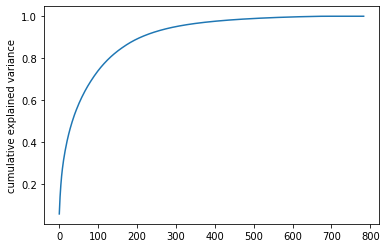

In [64]:
pca = PCA()
X = StandardScaler().fit_transform(X)
clf = pca.fit(X)
ex = -np.sort(-pca.explained_variance_ratio_)
plt.plot(np.array([i for i in range(784)]),np.cumsum(ex))
plt.ylabel('cumulative explained variance')
plt.show()

In [65]:
X_use_pca = PCA(n_components = 200).fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)
train_score = neigh.score(X_train,y_train)
test_score = neigh.score(X_test, y_test)
print("train_score:", train_score)
print("test_score:", test_score)

train_score: 1.0
test_score: 0.9397619047619048


In [6]:
X = np.load('mnist_data.npy')
Y = np.load('mnist_labels.npy')
#choose k = 1
def fun1(X,Y,lst = [3000,6000,9000,12000,15000,18000]):
    train_time = []
    test_time = []
    fit_time = []
    for i in lst:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = i/X.shape[0], random_state=42)
        neigh = KNeighborsClassifier(n_neighbors=1)
        
        start = time.time()
        neigh.fit(X_train,y_train)
        done = time.time()
        fit_time.append(done-start)
        
        start = time.time()
        score1 = neigh.predict(X_train)
        done = time.time()
        train_time.append(done-start)
        
        start = time.time()
        score2 = neigh.predict(X_test)
        done = time.time()
        test_time.append(done-start)
        
        print("------finished sample of " + str(i) + "-------" )


        
    # run on entire dataset
    neigh = KNeighborsClassifier(n_neighbors=1)
    
    start = time.time()
    neigh.fit(X,Y)
    done = time.time()
    fit_time.append(done-start)
    
    start = time.time()
    score1 = neigh.predict(X)
    done = time.time()
    train_time.append(done-start)
    test_time.append(0)
    return fit_time, train_time, test_time

fit_time,train_time,test_time = fun1(X,Y)

------finished sample of 3000-------
------finished sample of 6000-------
------finished sample of 9000-------
------finished sample of 12000-------
------finished sample of 15000-------
------finished sample of 18000-------


In [7]:
print(test_time)
print(fit_time)
print(train_time)
#[57.90613913536072, 98.01593494415283, 124.24178409576416, 118.788978099823, 83.39508295059204, 53.46879696846008, 0]
#[0.07208800315856934, 0.20525312423706055, 0.4542708396911621, 0.712238073348999, 1.0850768089294434, 1.3779771327972412, 1.8018240928649902]
#[5.205850839614868, 24.023065090179443, 50.07472896575928, 96.63762211799622, 138.33226799964905, 194.41972398757935, 261.5945267677307]

[57.90613913536072, 98.01593494415283, 124.24178409576416, 118.788978099823, 83.39508295059204, 53.46879696846008, 0]
[0.07208800315856934, 0.20525312423706055, 0.4542708396911621, 0.712238073348999, 1.0850768089294434, 1.3779771327972412, 1.8018240928649902]
[5.205850839614868, 24.023065090179443, 50.07472896575928, 96.63762211799622, 138.33226799964905, 194.41972398757935, 261.5945267677307]


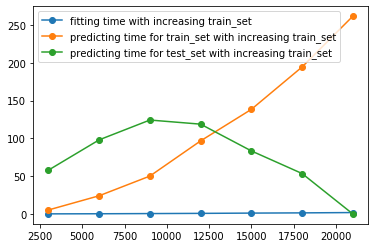

In [37]:
#decomposed plot for increasing traning size
plot_x = np.array([3000,6000,9000,12000,15000,18000,21000])
plt.plot(plot_x, fit_time, marker = "o", label = "fitting time with increasing train_set")
plt.plot(plot_x, train_time, marker = "o", label = "predicting time for train_set with increasing train_set")
plt.plot(plot_x, test_time, marker = "o", label = "predicting time for test_set with increasing train_set")
plt.legend()
plt.show()

In [56]:
X = np.load('mnist_data.npy')
Y = np.load('mnist_labels.npy')
#choose k = 1
def fun2(X,Y,lst = [50,150,250,350,450,550,650,750]):
    train_time = []
    test_time = []
    fit_time = []
    for i in lst:
        X = StandardScaler().fit_transform(X)
        X_use_pca = PCA(n_components = i).fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_use_pca, Y, train_size = 0.8, random_state=42)
        neigh = KNeighborsClassifier(n_neighbors=1)
        
        start = time.time()
        neigh.fit(X_use_pca,Y)
        done = time.time()
        fit_time.append(done-start)
        
        start = time.time()
        score1 = neigh.predict(X_train)
        done = time.time()
        train_time.append(done-start)
        
        start = time.time()
        score2 = neigh.predict(X_test)
        done = time.time()
        test_time.append(done-start)
        
        print("------finished sample of " + str(i) + "-------" )
    return fit_time, train_time, test_time

fit_time2,train_time2,test_time2 = fun2(X,Y)

------finished sample of 50-------
------finished sample of 150-------
------finished sample of 250-------
------finished sample of 350-------
------finished sample of 450-------
------finished sample of 550-------
------finished sample of 650-------
------finished sample of 750-------


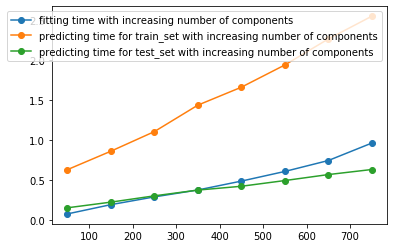

In [50]:
#decomposed plot for increasing n_components
plot_x2 = np.array([50,150,250,350,450,550,650,750])
plt.plot(plot_x2, fit_time2, marker = "o", label = "fitting time with increasing number of components")
plt.plot(plot_x2, train_time2, marker = "o", label = "predicting time for train_set with increasing number of components")
plt.plot(plot_x2, test_time2, marker = "o", label = "predicting time for test_set with increasing number of components")
plt.legend()
plt.show()


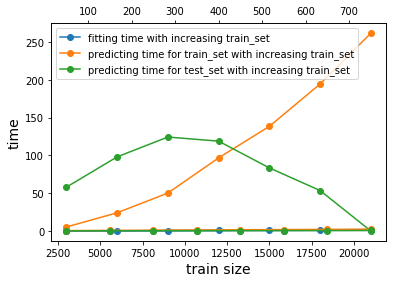

In [40]:
#final result for decomposed.
fig,ax = plt.subplots()
# make a plot
plot_x = np.array([3000,6000,9000,12000,15000,18000,21000])
ax.plot(plot_x, fit_time, marker = "o", label = "fitting time with increasing train_set")
ax.plot(plot_x, train_time, marker = "o", label = "predicting time for train_set with increasing train_set")
ax.plot(plot_x, test_time, marker = "o", label = "predicting time for test_set with increasing train_set")
# set x-axis label
ax.set_xlabel("train size",fontsize=14)
# set y-axis label
ax.set_ylabel("time",fontsize=14)
ax2=ax.twiny()
ax2.plot(plot_x2, fit_time2, marker = "o", label = "fitting time with increasing number of components")
ax2.plot(plot_x2, train_time2, marker = "o", label = "predicting time for train_set with increasing number of components")
ax2.plot(plot_x2, test_time2, marker = "o", label = "predicting time for test_set with increasing number of components")
ax.legend()
fig.savefig("p3d2.png")

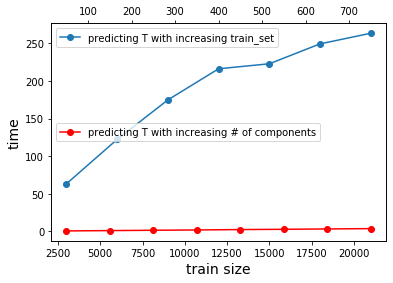

In [39]:
total_time = np.array(fit_time) + np.array(train_time) + np.array(test_time)
total_time2 = np.array(fit_time2) + np.array(train_time2) + np.array(test_time2)
fig,ax = plt.subplots()
# make a plot
plot_x = np.array([3000,6000,9000,12000,15000,18000,21000])
ax.plot(plot_x, total_time, marker = "o", label = "predicting T with increasing train_set")

# set x-axis label
ax.set_xlabel("train size",fontsize=14)
# set y-axis label
ax.set_ylabel("time",fontsize=14)
ax2=ax.twiny()
ax2.plot(plot_x2, total_time2, marker = "o", color = "red",label = "predicting T with increasing # of components")
ax.legend(loc = 'upper left')
ax2.legend(loc = 'center left')
fig.savefig("p3d.png")
plt.show()

In [53]:
#As from the plot, we see that there are 15 data points, and the question is asking for 
#top 50% at running time, so we can easily eliminate all data points in predicting time with increasing traning set.

def fun3(X,Y,lst = [50,150,250,350,450,550,650,750]):
    components_acc = []
    for i in lst:
        X = StandardScaler().fit_transform(X)
        X_use_pca = PCA(n_components = i).fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_use_pca, Y, train_size = 0.8)
        neigh = KNeighborsClassifier(n_neighbors=1)
        
        start = time.time()
        neigh.fit(X_use_pca,Y)
        done = time.time()
        fit_time.append(done-start)
        
        start = time.time()
        score1 = neigh.predict(X_train)
        done = time.time()
        train_time.append(done-start)
        
        start = time.time()
        score2 = neigh.predict(X_test)
        done = time.time()
        test_time.append(done-start)
        
        score3 = neigh.score(X_use_pca, Y)
        components_acc.append(score3)
        print("finished")
        
    return components_acc

components_acc = fun3(X,Y)

finished
finished
finished
finished
finished
finished
finished
finished


In [67]:
print(components_acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [90]:
X = np.load('mnist_data.npy')
Y = np.load('mnist_labels.npy')
x = X.reshape((21000,28,28))
print(x.shape)
#f_x = PCA(n_components = 10).fit_transform(x)
#print(f_x.shape)
import matplotlib.image as mpimg


(21000, 28, 28)


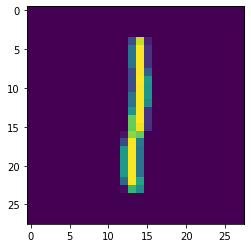

In [92]:
plt.imshow(x[0])

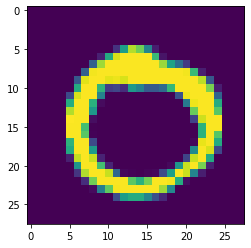

In [93]:
plt.imshow(x[1])

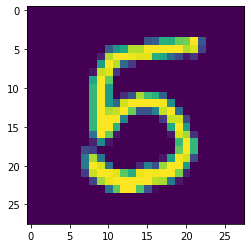

In [94]:
plt.imshow(x[2])

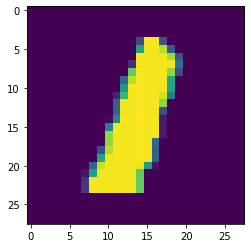

In [95]:
plt.imshow(x[3])

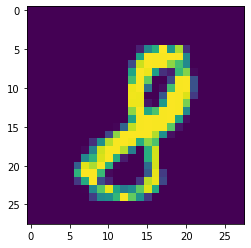

In [96]:
plt.imshow(x[4])

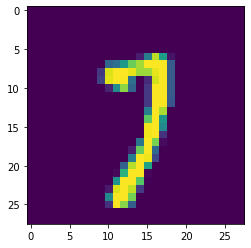

In [97]:
plt.imshow(x[5])

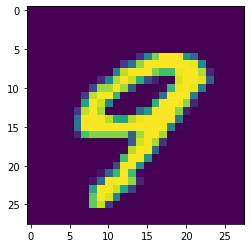

In [98]:
plt.imshow(x[6])

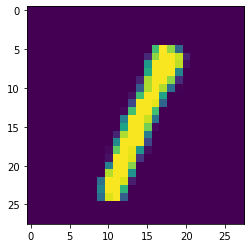

In [99]:
plt.imshow(x[7])

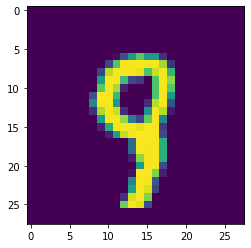

In [100]:
plt.imshow(x[8])

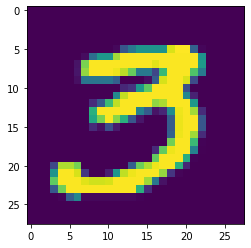

In [101]:
plt.imshow(x[9])